In [243]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [244]:
player_stats09 = pd.read_csv('Player Stats 2009.csv')
player_stats16 = pd.read_csv('Player Stats 2016.csv')
player_stats17 = pd.read_csv('Player Stats 2017.csv')
player_stats24 = pd.read_csv('Player Stats 2024.csv')

start = "\033[1m"
end = "\033[0;0m"

2009 winner: UNC Chapel Hill 

2016 winner: Villanova

2017 winner: UNC Chapel Hill

2024 winner: ...


### Data Description/Acquisition

This data was obtained from https://barttorvik.com/playerstat.php?year=2024 . The data was copied and pasted into an excel file where unnecessary columns (like `3P/100`) were removed and column names were edited to ensure consistency throughout each dataset.  Once the data was cleaned within excel, the file was converted to a csv file where it was then uploaded to this Jupyter notebook. Each year's data is described below, using the `data.describe()` function for a pandas dataframe after double checking that there are not any duplicate values or columns/rows that do not contain any information. 

The data imported to this Jupyter notebook describes the statistics collected on the top 1050 players for each year chosen (at random). 1050 was chosen as the number of players because if there are 64 teams in the bracket, that allows for each team to have at least 15 players within the top 1050, which is highly unlikely, therefore it encapsulated a good amount of players and there was high probability that the highest ranked players were in the March Madness tournament that year. 

In [245]:
check1 = player_stats09.duplicated().values.any()
check2 = player_stats09.isnull().values.any() 

check3 = player_stats16.duplicated().values.any()
check4 = player_stats16.isnull().values.any() 

check5 = player_stats17.duplicated().values.any()
check6 = player_stats17.isnull().values.any() 

check7 = player_stats24.duplicated().values.any()
check8 = player_stats24.isnull().values.any() 

print('check to see if data has issues that need to be addressed: ', check1, check2, check3, check4, check5, check6, check7, check8)
print('none of the data sets have duplicate items or NAN values! yay! ')

check to see if data has issues that need to be addressed:  False False False False False False False False
none of the data sets have duplicate items or NAN values! yay! 


In [246]:
winner09 = player_stats09[player_stats09['TEAM'] == 'North Carolina']
winner16 = player_stats16[player_stats16['TEAM'] == 'Villanova']
winner17 = player_stats17[player_stats17['TEAM'] == 'North Carolina']

In [247]:
player_stats09.head()

,RK,YEAR,NAME,TEAM,CONF,MIN%,PRPG!,BPM,ORTG,USG,...,TS,OR,DR,AST,TO,BLK,STL,FTR,2P,3P
0,1,Jr,Stephen Curry,Davidson,SC,82.1,6.5,15.3,118.0,37.5,...,60.5,1.8,12.3,39.8,16.6,0.7,3.9,36.1,0.518,0.388
1,2,Sr,Eric Maynor,VCU,CAA,88.0,6.4,10.6,117.3,32.6,...,58.3,1.6,10.0,40.8,15.4,0.5,2.9,45.3,0.516,0.361
2,3,So,James Harden,Arizona St.,P12,88.3,6.3,9.8,112.8,32.6,...,60.7,5.5,14.6,29.2,19.0,1.1,3.1,59.7,0.564,0.356
3,4,Jr,Ty Lawson,North Carolina,ACC,69.3,6.3,14.0,133.7,22.7,...,65.3,2.3,7.6,35.7,14.9,0.4,3.8,61.6,0.555,0.462
4,5,So,Blake Griffin,Oklahoma,B12,80.6,6.2,12.4,117.6,31.1,...,64.8,14.2,32.2,16.3,18.2,3.6,1.9,70.6,0.659,0.375


In [249]:
player_stats16.head() 

,RK,YEAR,NAME,TEAM,CONF,MIN%,PRPG!,BPM,ORTG,USG,...,TS,OR,DR,AST,TO,BLK,STL,FTR,2P,3P
0,1,Sr,Denzel Valentine,Michigan St.,B10,72.5,6.7,14.6,125.5,28.9,...,60.8,3.0,21.1,45.8,17.1,0.7,1.9,21.4,0.481,0.444
1,2,Sr,Buddy Hield,Oklahoma,B12,87.6,6.7,11.8,121.5,28.4,...,66.5,4.0,13.0,12.7,17.1,1.4,1.8,33.3,0.552,0.457
2,3,So,Grayson Allen,Duke,ACC,90.8,6.6,8.8,124.9,25.9,...,61.6,2.1,11.6,19.4,12.3,0.3,2.1,49.1,0.502,0.417
3,4,Jr,Kahlil Felder,Oakland,Horz,91.5,6.6,8.4,120.0,32.9,...,57.2,2.2,9.7,50.0,15.2,0.5,2.9,46.1,0.485,0.355
4,5,So,Tyler Ulis,Kentucky,SEC,88.5,6.5,9.6,125.7,24.1,...,56.7,1.7,7.1,34.3,13.0,0.3,2.3,44.1,0.486,0.344


In [250]:
player_stats17.head()

,RK,YEAR,NAME,TEAM,CONF,MIN%,PRPG!,BPM,ORTG,USG,...,TS,OR,DR,AST,TO,BLK,STL,FTR,2P,3P
0,1,Sr,Frank Mason III,Kansas,B12,89.4,6.8,10.0,125.2,25.5,...,62.2,2.0,10.4,26.1,14.4,0.2,2.0,48.4,0.500,0.471
1,2,So,Luke Kennard,Duke,ACC,88.8,6.4,9.3,127.3,23.0,...,62.9,3.9,12.1,13.6,11.2,0.9,1.4,38.6,0.525,0.438
2,3,Jr,Semi Ojeleye,SMU,Amer,85.4,6.1,8.4,127.5,24.5,...,62.1,8.4,15.0,9.3,10.7,1.6,0.8,50.8,0.529,0.424
3,4,Sr,Derrick Walton Jr.,Michigan,B10,86.2,6.1,9.5,125.8,23.8,...,62.3,1.7,16.1,27.3,13.2,0.1,2.0,43.4,0.456,0.422
4,5,Sr,Monte Morris,Iowa St.,B12,86.8,6.0,9.4,124.2,23.8,...,55.5,3.7,11.3,32.0,8.1,0.8,2.4,23.9,0.503,0.378


In [251]:
player_stats24.head()

,RK,YEAR,NAME,TEAM,CONF,MIN%,PRPG!,BPM,ORTG,USG,...,TS,OR,DR,AST,TO,BLK,STL,FTR,2P,3P
0,1,Sr,Zach Edey,Purdue,B10,77.1,7.7,15.4,130.0,33.1,...,66.1,18.8,25.3,15.0,12.4,7.4,0.5,84.5,0.623,0.500
1,2,Sr,Terrence Shannon Jr.,Illinois,B10,70.5,6.8,10.6,126.5,27.6,...,63.1,2.7,10.0,12.7,12.3,2.3,1.7,60.5,0.588,0.361
2,3,Sr,Mark Sears,Alabama,SEC,82.3,6.5,10.6,129.0,26.0,...,65.7,3.0,10.5,22.2,15.6,0.3,2.7,50.0,0.560,0.435
3,4,Jr,KJ Simpson,Colorado,P12,86.8,6.0,9.2,122.6,26.4,...,60.6,2.8,16.4,27.1,13.9,0.2,2.7,36.3,0.497,0.434
4,5,Sr,Jaedon LeDee,San Diego St.,MWC,79.4,6.0,10.1,120.5,30.2,...,62.9,11.5,17.1,10.2,14.0,2.0,2.1,68.6,0.574,0.436


#### Summary Statistics

**Breakdown of what each metric means:** 

- **RK** : Player Rank 
- **MIN%** : Total minutes played by a player throughout the season 
- **PRPG** : Points per game 
- **BPM** : Box plus minus - estimation of the players overall impact on the game per 100 posessions, relative to league average - this metric already takes into account various statistical categories. 
- **ORTG** : offensive rating - reflects a players offensive efficiency 
- **USG** : Usage rate - percentage of team plays used by a player while they're on the court. Essentially measures how involved a player is in the team's offensive posessions 
- **EFG** : Effective Field Goal Percentage - this metric adjusts traditional field goal percentage to account for the fact that three pointers are worth more than two pointers 
- **TS** : True shooting percentage (shooting efficiency) 
- **OR** : offensive rebounds 
- **DR** : defensive rebounds 
- **AST** : Assists 
- **TO** : Turnovers 
- **BLK** : Blocks 
- **STL** : Steals 
- **FTR** : Free throw rate 
- **2P** : two point percentage 
- **3P** : three point percentage

In [5]:
player_stats09.describe()

,RK,MIN%,PRPG!,BPM,ORTG,USG,EFG,TS,OR,DR,AST,TO,BLK,STL,FTR,2P,3P
count,1050.000000,1050.000000,1050.000000,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,525.500000,70.835714,2.688952,3.04600,107.960095,22.201238,52.263333,55.893143,5.886762,13.250857,14.623619,17.693238,1.800762,2.036286,38.274571,0.498674,0.304719
std,303.253195,12.226563,1.025040,2.92572,7.557351,4.220034,5.127850,4.451130,3.842203,5.046510,7.938309,3.795201,2.167020,0.820128,15.199317,0.067006,0.146267
min,1.000000,40.000000,1.400000,-3.90000,86.800000,11.600000,36.600000,42.400000,0.400000,3.600000,1.100000,7.500000,0.000000,0.300000,8.200000,0.278000,0.000000
25%,263.250000,62.400000,1.900000,1.00000,102.700000,19.100000,48.700000,52.700000,2.600000,9.300000,8.800000,15.200000,0.400000,1.400000,27.325000,0.455000,0.286000
50%,525.500000,72.500000,2.400000,2.80000,107.500000,22.200000,51.800000,55.500000,5.000000,12.450000,12.850000,17.700000,1.000000,1.900000,36.250000,0.496500,0.347500
75%,787.750000,80.100000,3.200000,4.80000,112.800000,24.900000,55.500000,58.700000,8.800000,16.775000,19.000000,20.200000,2.300000,2.500000,47.275000,0.540000,0.389000
max,1050.000000,98.000000,6.500000,15.30000,134.400000,37.500000,76.300000,72.300000,23.700000,37.900000,45.400000,31.000000,15.200000,5.600000,104.700000,0.763000,1.000000


In [6]:
player_stats16.describe()

,RK,MIN%,PRPG!,BPM,ORTG,USG,EFG,TS,OR,DR,AST,TO,BLK,STL,FTR,2P,3P
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,525.500000,70.806667,2.667048,3.002095,110.476190,22.237333,52.781429,56.569238,5.303714,13.849810,14.955810,15.681714,1.838476,1.810476,38.986762,0.502360,0.322453
std,303.253195,11.915986,0.946470,2.783571,7.563982,4.222681,5.247000,4.382683,3.840405,5.319983,8.127792,3.458925,2.073861,0.754917,14.865276,0.069751,0.133017
min,1.000000,40.000000,1.500000,-4.400000,88.600000,10.200000,38.500000,44.900000,0.100000,4.000000,0.700000,2.800000,0.000000,0.300000,1.800000,0.000000,0.000000
25%,263.250000,62.200000,1.925000,1.000000,105.100000,19.350000,49.200000,53.500000,2.100000,9.800000,8.700000,13.300000,0.400000,1.300000,28.300000,0.458000,0.306000
50%,525.500000,72.150000,2.400000,2.700000,109.900000,22.100000,52.400000,56.300000,4.200000,12.900000,13.200000,15.500000,1.100000,1.700000,36.650000,0.499000,0.354000
75%,787.750000,79.800000,3.200000,4.800000,115.600000,25.000000,55.800000,59.300000,7.800000,17.300000,19.675000,17.900000,2.500000,2.300000,49.000000,0.547000,0.392000
max,1050.000000,96.700000,6.700000,14.600000,134.200000,38.500000,72.500000,73.800000,18.800000,39.200000,50.000000,27.600000,11.900000,6.300000,106.700000,0.724000,1.000000


In [7]:
player_stats17.describe()

,RK,MIN%,PRPG!,BPM,ORTG,USG,EFG,TS,OR,DR,AST,TO,BLK,STL,FTR,2P,3P
count,1050.000000,1050.000000,1050.00000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,525.500000,71.038667,2.68619,3.027333,110.451905,22.271714,53.540095,57.145238,5.028952,13.944762,15.197619,16.148952,1.830571,1.822667,37.060286,0.507904,0.332629
std,303.253195,12.144711,0.94022,2.805786,7.790953,4.572597,5.207636,4.329234,3.724049,5.313877,7.942277,3.566364,2.124573,0.769535,13.344876,0.069942,0.127520
min,1.000000,40.300000,1.50000,-4.200000,89.100000,10.200000,38.600000,45.200000,0.400000,2.800000,1.100000,5.300000,0.000000,0.100000,6.800000,0.262000,0.000000
25%,263.250000,62.800000,1.90000,1.000000,105.400000,19.300000,50.000000,54.200000,2.000000,9.700000,9.000000,13.600000,0.400000,1.300000,27.625000,0.462000,0.323000
50%,525.500000,73.050000,2.50000,2.800000,109.800000,22.200000,53.200000,56.900000,3.700000,13.300000,13.800000,16.100000,1.000000,1.700000,36.100000,0.505500,0.365000
75%,787.750000,80.300000,3.20000,4.800000,115.100000,25.275000,56.400000,59.700000,7.575000,17.375000,19.975000,18.400000,2.400000,2.200000,44.975000,0.551000,0.400000
max,1050.000000,95.000000,6.80000,15.800000,141.500000,38.100000,79.000000,76.100000,17.600000,34.900000,48.000000,28.100000,14.500000,5.800000,94.900000,0.790000,1.000000


In [8]:
player_stats24.describe()

,RK,MIN%,PRPG!,BPM,ORTG,USG,EFG,TS,OR,DR,AST,TO,BLK,STL,FTR,2P,3P
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,525.500000,70.312571,2.842952,3.020000,112.498095,22.318857,53.605905,57.125238,5.087714,14.089238,14.799905,14.587714,1.872476,1.939333,35.254667,0.522094,0.326146
std,303.253195,11.963178,0.889057,2.825308,7.667122,4.441906,5.458035,4.470420,3.776710,5.110886,7.727854,3.478512,2.037399,0.816153,14.117731,0.069392,0.116352
min,1.000000,40.300000,1.700000,-3.800000,93.000000,10.200000,38.100000,46.400000,0.000000,3.300000,1.400000,2.500000,0.000000,0.300000,6.500000,0.325000,0.000000
25%,263.250000,61.900000,2.100000,0.900000,106.925000,19.100000,49.700000,53.900000,2.000000,10.200000,9.125000,12.200000,0.500000,1.300000,25.325000,0.471000,0.306250
50%,525.500000,71.900000,2.600000,2.700000,111.900000,22.200000,52.950000,56.700000,3.900000,13.200000,13.100000,14.700000,1.100000,1.800000,32.950000,0.515000,0.351000
75%,787.750000,79.400000,3.300000,4.700000,117.300000,25.500000,57.075000,59.975000,7.300000,17.200000,19.500000,16.900000,2.500000,2.400000,42.600000,0.567750,0.389000
max,1050.000000,97.600000,7.700000,15.400000,137.200000,37.300000,73.300000,72.200000,20.800000,32.800000,44.700000,26.600000,12.700000,5.600000,101.900000,0.741000,1.000000


### Data Cleaning and Processing 

As stated above, a large portion of the cleaning for this dataset was done within the excel file itself. For the processing portion however, different subsets of data were grouped together to explore what players and the teams they played on had the highest rankings per statistic. Here, the data is first grouped by team and explored, then by individual player, and then by conference. Please note that once we get further, this data will also be edited to only contain the teams that made it to the March Madness tournament in each particular year. This will help remove any discrepancy for our training data set, to prevent it from predicting a team to win that wasn't even in the tournament to begin with. 

**Finding out which teams had the most players ranked in the top 1050 for each particular year**

In [9]:
team_groups09 = player_stats09.groupby('TEAM')
team_groups09 = team_groups09.groups

team_groups16 = player_stats16.groupby('TEAM')
team_groups16 = team_groups16.groups

team_groups17 = player_stats17.groupby('TEAM')
team_groups17 = team_groups17.groups

team_groups24 = player_stats24.groupby('TEAM')
team_groups24 = team_groups24.groups

In [10]:
team_groups09.keys()
teams = []
for team in team_groups09.keys():
    teams.append(team)
np.array(teams)
    
team_groups09.values() 
values = [] 
for value in team_groups09.values(): 
    values.append(len(value))
np.array(values)

print('The team with the most players in the top 1000 in 2009 was :', teams[302], 'with ', values[302], 'players')
print('in 2009 Villanova made it to the final four, but lost to UNC Chapel Hill')

The team with the most players in the top 1000 in 2009 was : Villanova with  7 players
in 2009 Villanova made it to the final four, but lost to UNC Chapel Hill


In [11]:
teams = []
for team in team_groups16.keys():
    teams.append(team)
np.array(teams)

values = [] 
for value in team_groups16.values(): 
    values.append(len(value))
np.array(values)

print('The team with the most players in the top 1000 in 2016 was :', teams[9], 'with ', values[9], 'players')
print('U of A went out in the first round in 2016')

The team with the most players in the top 1000 in 2016 was : Arizona with  7 players
U of A went out in the first round in 2016


In [12]:
teams = []
values = []

for team, value in team_groups17.items(): 
    teams.append(team) 
    values.append(len(value))
    
max_value = np.max(values) 
max_indicies = np.where(values == max_value)[0] 

print('The teams with the most players in the top 1000 in 2017 were: ')
for index in max_indicies: 
    print(teams[index], 'with', values[index], 'players') 
    


The teams with the most players in the top 1000 in 2017 were: 
Butler with 7 players
Marquette with 7 players
Villanova with 7 players
Virginia Tech with 7 players


In [13]:
teams = []
values = []

for team, value in team_groups24.items(): 
    teams.append(team) 
    values.append(len(value))
    
max_value = np.max(values) 
max_indicies = np.where(values == max_value)[0] 

print('The teams with the most players in the top 1000 in 2024 are: ')
for index in max_indicies: 
    print(teams[index], 'with', values[index], 'players')

The teams with the most players in the top 1000 in 2024 are: 
BYU with 7 players
Cincinnati with 7 players
Texas with 7 players


**Finding out which team had the highest of each statistic in each particular year**

In [125]:
team_average24 = player_stats24.groupby('TEAM').mean()
team_average24 = team_average24.drop(columns = ['RK'], axis = 1)

In [124]:
team_average09 = player_stats09.groupby('TEAM').mean()
team_average09 = team_average09.drop(columns = ['RK'], axis = 1)

In [117]:
team_average16 = player_stats16.groupby('TEAM').mean()
team_average16 = team_average16.drop(columns = ['RK'], axis = 1)

In [118]:
team_average17 = player_stats17.groupby('TEAM').mean()
team_average17 = team_average17.drop(columns = ['RK'], axis = 1)

In [126]:
for stat in team_average09: 
    team = team_average09[stat].idxmax() 
    value = team_average09[stat].max()
    print('The team with the highest ', stat, 'is: ', team)
    print('With an average of: ', value)
    print()

The team with the highest  MIN% is:  UMBC
With an average of:  89.10000000000001

The team with the highest  PRPG! is:  Kentucky
With an average of:  5.5

The team with the highest  BPM is:  Texas A&M Corpus Chr
With an average of:  8.9

The team with the highest  ORTG is:  Tennessee Martin
With an average of:  123.0

The team with the highest  USG is:  Eastern Michigan
With an average of:  32.4

The team with the highest  EFG is:  Northern Arizona
With an average of:  63.0

The team with the highest  TS is:  Denver
With an average of:  63.85

The team with the highest  OR is:  Iona
With an average of:  15.3

The team with the highest  DR is:  Coastal Carolina
With an average of:  25.5

The team with the highest  AST is:  Hofstra
With an average of:  32.6

The team with the highest  TO is:  Pepperdine
With an average of:  26.4

The team with the highest  BLK is:  Southeastern Louisia
With an average of:  8.3

The team with the highest  STL is:  Texas A&M Corpus Chr
With an average of: 

In [127]:
for stat in team_average16: 
    team = team_average16[stat].idxmax() 
    value = team_average16[stat].max()
    print('The team with the highest ', stat, 'is: ', team)
    print('With an average of: ', value)
    print()

The team with the highest  MIN% is:  Bethune Cookman
With an average of:  94.0

The team with the highest  PRPG! is:  Wyoming
With an average of:  4.65

The team with the highest  BPM is:  Wichita St.
With an average of:  8.4

The team with the highest  ORTG is:  Stephen F. Austin
With an average of:  122.73333333333333

The team with the highest  USG is:  Howard
With an average of:  35.1

The team with the highest  EFG is:  Belmont
With an average of:  62.5

The team with the highest  TS is:  Belmont
With an average of:  64.225

The team with the highest  OR is:  Longwood
With an average of:  12.3

The team with the highest  DR is:  Texas A&M Corpus Chr
With an average of:  23.05

The team with the highest  AST is:  Northern Arizona
With an average of:  34.3

The team with the highest  TO is:  Liberty
With an average of:  24.1

The team with the highest  BLK is:  Florida Atlantic
With an average of:  8.6

The team with the highest  STL is:  Prairie View A&M
With an average of:  3.8

T

In [122]:
for stat in team_average17: 
    team = team_average17[stat].idxmax() 
    value = team_average17[stat].max()
    print('The team with the highest ', stat, 'is: ', team)
    print('With an average of: ', value)
    print()

The team with the highest  MIN% is:  Jackson St.
With an average of:  92.2

The team with the highest  PRPG! is:  North Florida
With an average of:  4.9

The team with the highest  BPM is:  North Carolina
With an average of:  7.8500000000000005

The team with the highest  ORTG is:  UCLA
With an average of:  123.05

The team with the highest  USG is:  Campbell
With an average of:  36.9

The team with the highest  EFG is:  American
With an average of:  62.9

The team with the highest  TS is:  Eastern Washington
With an average of:  64.60000000000001

The team with the highest  OR is:  Utah Valley
With an average of:  15.9

The team with the highest  DR is:  Utah Valley
With an average of:  27.3

The team with the highest  AST is:  Stony Brook
With an average of:  35.7

The team with the highest  TO is:  Southeastern Louisia
With an average of:  26.5

The team with the highest  BLK is:  Illinois Chicago
With an average of:  9.5

The team with the highest  STL is:  Texas A&M Corpus Chr
Wit

In [128]:
for stat in team_average24: 
    team = team_average24[stat].idxmax() 
    value = team_average24[stat].max()
    print('The team with the highest ', stat, 'is: ', team)
    print('With an average of: ', value)
    print()

The team with the highest  MIN% is:  Nebraska Omaha
With an average of:  92.4

The team with the highest  PRPG! is:  Nebraska Omaha
With an average of:  4.9

The team with the highest  BPM is:  Houston
With an average of:  9.02

The team with the highest  ORTG is:  Connecticut
With an average of:  125.66666666666667

The team with the highest  USG is:  Dartmouth
With an average of:  33.7

The team with the highest  EFG is:  Idaho
With an average of:  66.4

The team with the highest  TS is:  North Florida
With an average of:  66.2

The team with the highest  OR is:  Iona
With an average of:  15.0

The team with the highest  DR is:  Prairie View A&M
With an average of:  29.1

The team with the highest  AST is:  Green Bay
With an average of:  33.6

The team with the highest  TO is:  Mount St. Mary's
With an average of:  20.65

The team with the highest  BLK is:  Utah Valley
With an average of:  8.3

The team with the highest  STL is:  Fordham
With an average of:  4.2

The team with the hi

**Finding out which player had the highest statistic and what team they played for in each particular year**

In [199]:
player_group09 = player_stats09.groupby('NAME')
player_group09 = player_group09.groups
player_average09 = player_stats09.groupby('NAME').mean()
player_average09 = player_average09.drop(columns = ['RK'], axis = 1)


for stat in player_average09: 
    player = player_average09[stat]
    best_player_name = player.idxmax()
    player_stats_reset_index = player_stats09.reset_index()
    best_player_team = player_stats_reset_index.loc[player_stats_reset_index['NAME'] == best_player_name, 'TEAM'].iloc[0]
    value = player_average09[stat].max()
    print('The player with the highest ', start+ stat + end, 'is: ',start + best_player_name + end,'on:', start + best_player_team + end)
    print('With an average of: ', value)
    print()

The player with the highest  MIN% is:  Darryl Proctor on: UMBC
With an average of:  98.0

The player with the highest  PRPG! is:  Stephen Curry on: Davidson
With an average of:  6.5

The player with the highest  BPM is:  Stephen Curry on: Davidson
With an average of:  15.3

The player with the highest  ORTG is:  Demetrius Young on: Stony Brook
With an average of:  134.4

The player with the highest  USG is:  Stephen Curry on: Davidson
With an average of:  37.5

The player with the highest  EFG is:  Shane Johannsen on: Northern Arizona
With an average of:  76.3

The player with the highest  TS is:  Brett Lauer on: UC Irvine
With an average of:  72.3

The player with the highest  OR is:  DeJuan Blair on: Pittsburgh
With an average of:  23.7

The player with the highest  DR is:  John Bryant on: Santa Clara
With an average of:  37.9

The player with the highest  AST is:  Brock Young on: East Carolina
With an average of:  45.4

The player with the highest  TO is:  Luka Drca on: Utah
With an

In [198]:
player_group16 = player_stats16.groupby('NAME')
player_group16 = player_group16.groups
player_average16 = player_stats16.groupby('NAME').mean()
player_average16 = player_average16.drop(columns = ['RK'], axis = 1)


for stat in player_average16: 
    player = player_average16[stat]
    best_player_name = player.idxmax()
    player_stats_reset_index = player_stats16.reset_index()
    best_player_team = player_stats_reset_index.loc[player_stats_reset_index['NAME'] == best_player_name, 'TEAM'].iloc[0]
    value = player_average16[stat].max()
    print('The player with the highest ', start+ stat + end, 'is: ',start + best_player_name + end,'on:', start + best_player_team + end)
    print('With an average of: ', value)
    print()

The player with the highest  MIN% is:  Yonel Brown on: Kennesaw St.
With an average of:  96.7

The player with the highest  PRPG! is:  Buddy Hield on: Oklahoma
With an average of:  6.7

The player with the highest  BPM is:  Denzel Valentine on: Michigan St.
With an average of:  14.6

The player with the highest  ORTG is:  Aaron Bodager on: North Florida
With an average of:  134.2

The player with the highest  USG is:  Jordan Washington on: Iona
With an average of:  38.5

The player with the highest  EFG is:  Aaron Bodager on: North Florida
With an average of:  72.5

The player with the highest  TS is:  Aaron Bodager on: North Florida
With an average of:  73.8

The player with the highest  OR is:  Rico Gathers on: Baylor
With an average of:  18.8

The player with the highest  DR is:  Egidijus Mockevicius on: Evansville
With an average of:  39.2

The player with the highest  AST is:  Kahlil Felder on: Oakland
With an average of:  50.0

The player with the highest  TO is:  Lavon Long on: 

In [196]:
player_group17 = player_stats17.groupby('NAME ')
player_group17 = player_group17.groups
player_average17 = player_stats17.groupby('NAME ').mean()
player_average17 = player_average17.drop(columns = ['RK'], axis = 1)

for stat in player_average17: 
    player = player_average17[stat]
    best_player_name = player.idxmax()
    player_stats_reset_index = player_stats17.reset_index()
    best_player_team = player_stats_reset_index.loc[player_stats_reset_index['NAME '] == best_player_name, 'TEAM'].iloc[0]
    value = player_average17[stat].max()
    print('The player with the highest ', start+ stat + end, 'is: ',start + best_player_name + end,'on:', start + best_player_team + end)
    print('With an average of: ', value)
    print()

The player with the highest  MIN% is:  Matt Mobley on: St. Bonaventure
With an average of:  95.0

The player with the highest  PRPG! is:  Frank Mason III on: Kansas
With an average of:  6.8

The player with the highest  BPM is:  Sindarius Thornwell on: South Carolina
With an average of:  15.8

The player with the highest  ORTG is:  Devontae Cacok on: UNC Wilmington
With an average of:  141.5

The player with the highest  USG is:  Ronnie Boyce on: San Francisco
With an average of:  38.1

The player with the highest  EFG is:  Devontae Cacok on: UNC Wilmington
With an average of:  79.0

The player with the highest  TS is:  Devontae Cacok on: UNC Wilmington
With an average of:  76.1

The player with the highest  OR is:  Sidy Djitte on: Clemson
With an average of:  17.6

The player with the highest  DR is:  Steve Taylor, Jr. on: Toledo
With an average of:  34.9

The player with the highest  AST is:  Maurice Watson Jr. on: Creighton
With an average of:  48.0

The player with the highest  TO 

In [197]:
player_group24 = player_stats24.groupby('NAME')
player_group24 = player_group24.groups
player_average24 = player_stats24.groupby('NAME').mean()
player_average24 = player_average24.drop(columns = ['RK'], axis = 1)

for stat in player_average24: 
    player = player_average24[stat]
    best_player_name = player.idxmax()
    player_stats_reset_index = player_stats24.reset_index()
    best_player_team = player_stats_reset_index.loc[player_stats_reset_index['NAME'] == best_player_name, 'TEAM'].iloc[0]
    value = player_average24[stat].max()
    print('The player with the highest ', start+ stat + end, 'is: ',start + best_player_name + end,'on:', start + best_player_team + end)
    print('With an average of: ', value)
    print()
    

The player with the highest  MIN% is:  Issac McBride on: Oral Roberts
With an average of:  97.6

The player with the highest  PRPG! is:  Zach Edey on: Purdue
With an average of:  7.7

The player with the highest  BPM is:  Zach Edey on: Purdue
With an average of:  15.4

The player with the highest  ORTG is:  Cam Spencer on: Connecticut
With an average of:  137.2

The player with the highest  USG is:  Malik Dia on: Belmont
With an average of:  37.3

The player with the highest  EFG is:  Quincy Ballard on: Wichita St.
With an average of:  73.3

The player with the highest  TS is:  Koby Brea on: Dayton
With an average of:  72.2

The player with the highest  OR is:  Sam Godwin on: Oklahoma
With an average of:  20.8

The player with the highest  DR is:  Enrique Freeman on: Akron
With an average of:  32.8

The player with the highest  AST is:  Reece Beekman on: Virginia
With an average of:  44.7

The player with the highest  TO is:  Kerr Kriisa on: West Virginia
With an average of:  26.6

The

**Correlation Matrix for each team's statistics** 

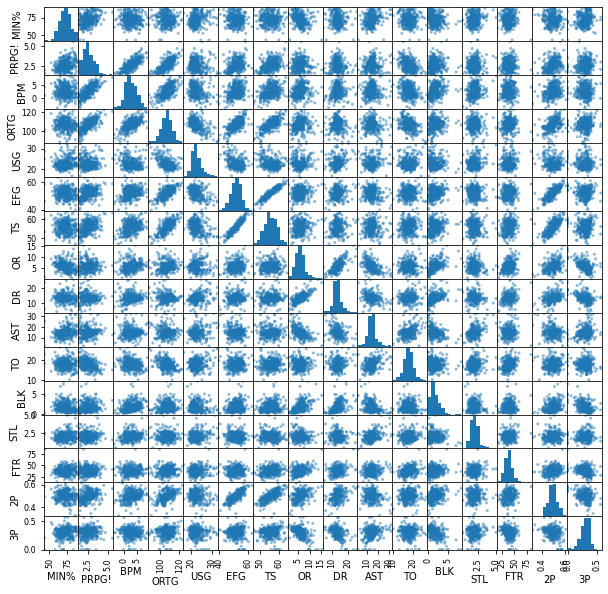

In [235]:
pd.plotting.scatter_matrix(team_average09, figsize = (10,10));

**Correlation Matrix for each players statistics**

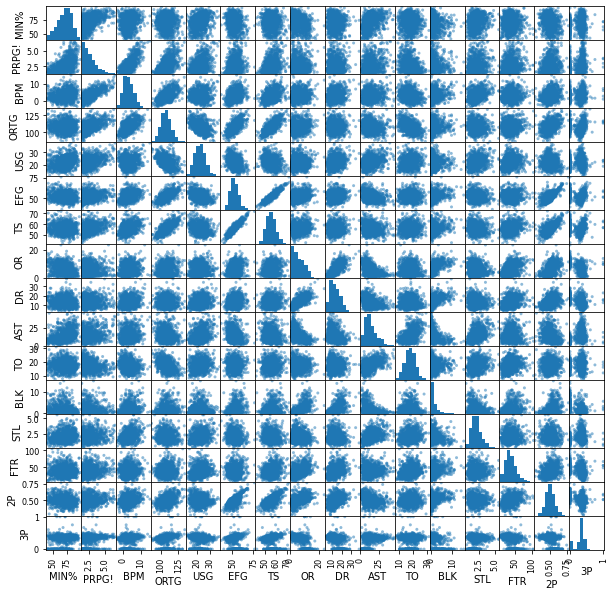

In [239]:
pd.plotting.scatter_matrix(player_average09, figsize = (10,10));

In [233]:
conferences09 = player_stats09.groupby('CONF').mean()
conferences16 = player_stats16.groupby('CONF').mean() 
conferences17 = player_stats17.groupby('CONF').mean() 
conferences24 = player_stats24.groupby('CONF').mean() 